## 1. Importación de librerías y carga de dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../output/dataset_farmacia_integrado.csv", parse_dates=['fecha'])
df_for_eda = df.copy()
print("✅ Dataset cargado:", df.shape)

✅ Dataset cargado: (175352, 9)


In [2]:
# Estilo general
plt.style.use('ggplot')
sns.set_palette('muted')

## 2. Análisis general del dataset

In [3]:
print("Información general del dataset:")
df.info()

print("\nEstadísticas descriptivas del dataset:")
display(df.describe(include='all').T)  # Transpuesta para verlo mejor

print("\nCantidad de valores nulos por columna:")
nulos = df.isnull().sum().to_frame(name="valores_nulos")
nulos["% nulos"] = (nulos["valores_nulos"] / len(df) * 100).round(2)
display(nulos)

print("\nPrimeros 5 registros:")
display(df.head(5))

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175352 entries, 0 to 175351
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id_venta            175352 non-null  int64         
 1   fecha               175352 non-null  datetime64[ns]
 2   total_venta         175352 non-null  float64       
 3   precio_unitario     175352 non-null  float64       
 4   total_unitario      175352 non-null  float64       
 5   precio_compra       175352 non-null  float64       
 6   nombre              175352 non-null  object        
 7   nombre_normalizado  175352 non-null  object        
 8   cantidad_total      175352 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 12.0+ MB

Estadísticas descriptivas del dataset:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id_venta,175352.0,NaN,NaN,NaN,6969.018141,1.0,2746.0,6218.0,11023.0,16229.0,4781.270467
fecha,175352,NaN,NaN,NaN,2021-10-26 04:56:10.555226112,2019-01-07 00:00:00,2019-11-23 00:00:00,2021-08-17 00:00:00,2023-07-11 00:00:00,2025-08-18 00:00:00,NaN
total_venta,175352.0,NaN,NaN,NaN,457.667437,0.0,195.0,331.0,570.0,8450.0,420.685028
precio_unitario,175352.0,NaN,NaN,NaN,13.871039,0.0,2.2,5.0,13.005,559.0,24.669979
total_unitario,175352.0,NaN,NaN,NaN,39.694466,0.0,6.0,13.0,30.0,1498395.0,3629.585956
precio_compra,175352.0,NaN,NaN,NaN,8.64037,0.01,1.19,2.9,7.0,442.5,17.814746
nombre,175352,4051,DEXAMETASONA 8MG AMPOLLAS X 100,4376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nombre_normalizado,175352,4027,dexametasona 8 mg ampollas 100 unidades,4376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cantidad_total,175352.0,NaN,NaN,NaN,11.502766,1.0,1.0,2.0,5.0,998930.0,2389.038828



Cantidad de valores nulos por columna:


,valores_nulos,% nulos
id_venta,0,0.0
fecha,0,0.0
total_venta,0,0.0
precio_unitario,0,0.0
total_unitario,0,0.0
precio_compra,0,0.0
nombre,0,0.0
nombre_normalizado,0,0.0
cantidad_total,0,0.0



Primeros 5 registros:


,id_venta,fecha,total_venta,precio_unitario,total_unitario,precio_compra,nombre,nombre_normalizado,cantidad_total
0,1,2019-01-07,0.0,8.00,16.0,4.75,URIDON F X 16 COMPRIMIDOS,uridon f 16 unidades comprimidos,2.0
1,17,2019-01-07,200.0,0.80,44.0,0.46,METFORMINA SAE 850mg x 100com,metformina sae 850 mg 100 unidades com,55.0
2,17,2019-01-07,200.0,6.00,6.0,3.80,ALCOHOL 120 ML,alcohol 120 ml,1.0
3,17,2019-01-07,200.0,0.45,12.6,0.34,ASPIRINETA 100 (BAYER),aspirineta 100 bayer,28.0
4,17,2019-01-07,200.0,1.00,20.0,0.66,JERINGA 1 ML INSULINA NIPRO,jeringa 1 ml insulina nipro,20.0


In [4]:
df['año'] = df['fecha'].dt.year
unique_years = df['año'].unique()

## ¿Cuáles son los medicamentos más vendidos en términos de cantidad?

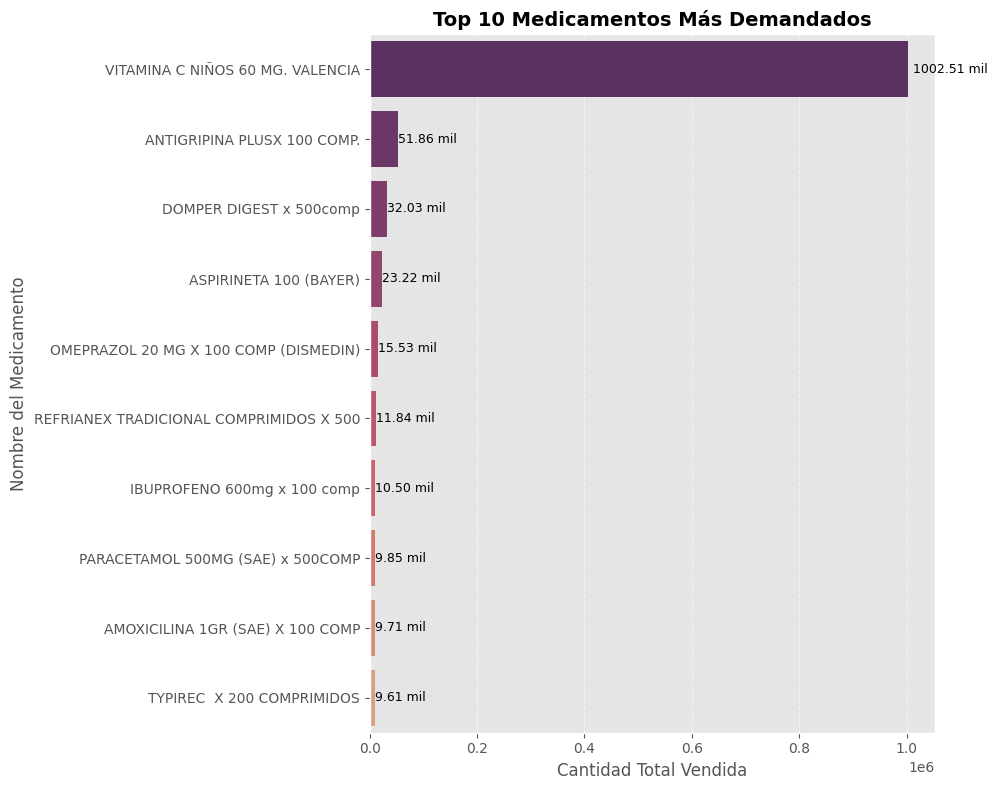

In [19]:
# Agrupar por nombre de medicamento y sumar la cantidad total
top_med = df.groupby('nombre')['cantidad_total'].sum().nlargest(10)

# Crear gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x=top_med.values, y=top_med.index, palette='flare_r')

# Títulos y etiquetas
plt.title("Top 10 Medicamentos Más Demandados", fontsize=14, weight="bold")
plt.xlabel("Cantidad Total Vendida", fontsize=12)
plt.ylabel("Nombre del Medicamento", fontsize=12)

# Añadir etiquetas en el gráfico
for j, value in enumerate(top_med.values):
    plt.text(value + (value * 0.01), j, f'{value/1000:.2f} mil', va='center', fontsize=9, color='black')

# Establecer la cuadrícula
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Ajustar el layout
plt.tight_layout()
plt.show()


## ¿Cuáles son los medicamentos que generan mayores ingresos totales?

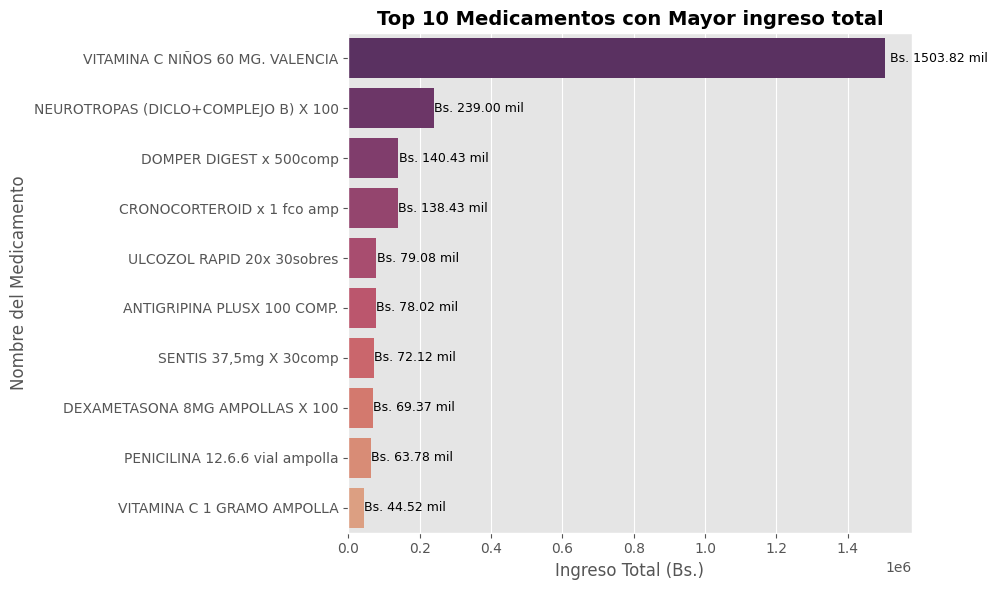

In [20]:
# Agrupar por nombre de medicamento y sumar la cantidad total sin filtrar por año
top_med = df.groupby('nombre')['total_unitario'].sum().nlargest(10)

# Crear gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=top_med.values, y=top_med.index, palette='flare_r')

# Títulos y etiquetas
plt.title("Top 10 Medicamentos con Mayor ingreso total", fontsize=14, weight="bold")
plt.xlabel("Ingreso Total (Bs.)", fontsize=12)
plt.ylabel("Nombre del Medicamento", fontsize=12)

# Añadir etiquetas en el gráfico
for j, value in enumerate(top_med.values):
    plt.text(value + (value * 0.01), j, f'Bs. {value/1000:.2f} mil', va='center', fontsize=9, color='black')

# Ajustar el layout
plt.tight_layout()
plt.show()


In [7]:
df_grouped = df.groupby('id_venta')['total_unitario'].sum().reset_index()
df_grouped = (
    df.groupby('id_venta')
      .agg({
          'fecha': 'first',
          'total_venta': 'first'
      })
      .reset_index()
)

df_grouped['nombre_dia'] = df_grouped['fecha'].dt.day_name()
df_grouped['nombre_mes'] = df_grouped['fecha'].dt.month_name()
df_grouped['año'] = df_grouped['fecha'].dt.year

df_grouped

ventas_por_dia_t = df_grouped.groupby(['nombre_dia'])['total_venta'].sum()
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_por_dia_t = ventas_por_dia_t.reindex(orden_dias)

venta_mensual_t = df_grouped.groupby('nombre_mes')['total_venta'].sum()

orden_meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
venta_mensual_t = venta_mensual_t.reindex(orden_meses)
 
venta_anual = df_grouped.groupby('año')['total_venta'].sum()



## ¿Existen patrones entre el precio de los medicamentos y sus ventas?

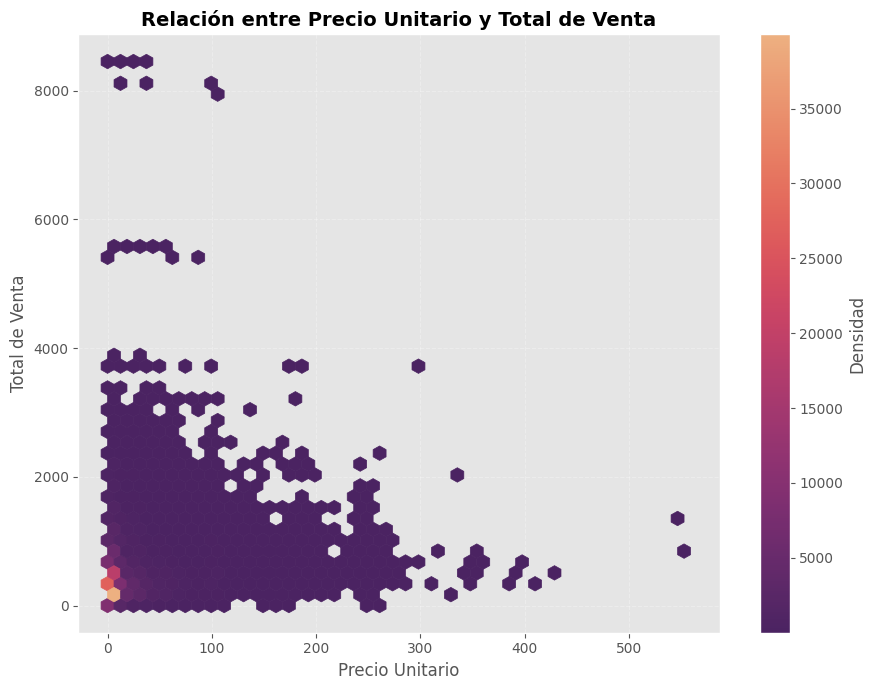

In [21]:
plt.figure(figsize=(9, 7))

plt.hexbin(
    df['precio_unitario'],
    df['total_venta'],
    gridsize=45,
    cmap='flare_r',
    mincnt=1
)

plt.colorbar(label='Densidad')

plt.title('Relación entre Precio Unitario y Total de Venta', fontsize=14, fontweight='bold')
plt.xlabel('Precio Unitario', fontsize=12)
plt.ylabel('Total de Venta', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()



## ¿Cómo han variado las ventas de medicamentos a lo largo del tiempo, tanto mensualmente como semanalmente y anualmente?

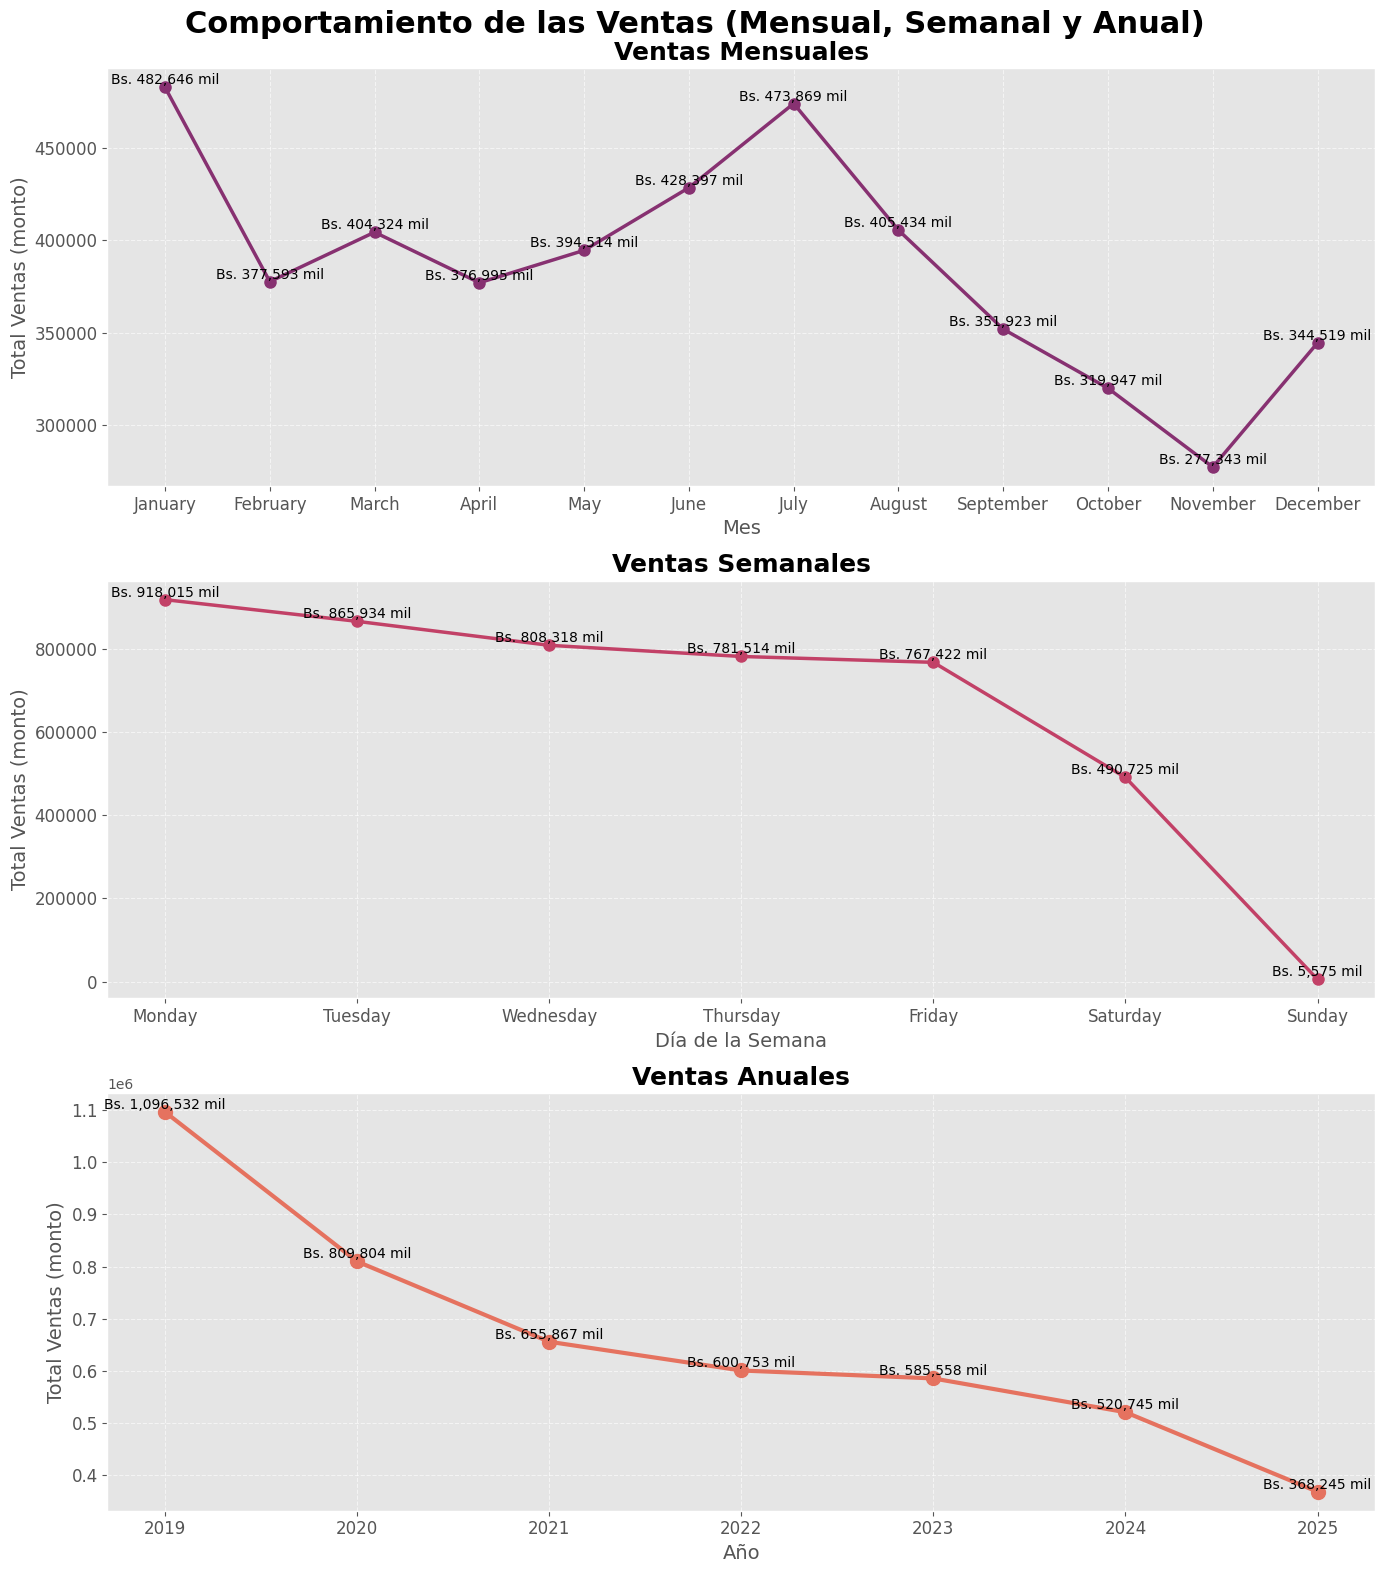

In [22]:
colors = sns.color_palette('flare_r', 3)

fig, axes = plt.subplots(3, 1, figsize=(14, 16))

# 1. Ventas Mensuales
axes[0].plot(
    venta_mensual_t.index.astype(str),
    venta_mensual_t.values,
    marker='o',
    markersize=8,
    linewidth=2.5,
    color=colors[0]
)
axes[0].set_title('Ventas Mensuales', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Mes', fontsize=14)
axes[0].set_ylabel('Total Ventas (monto)', fontsize=14)
axes[0].tick_params(axis='both', labelsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

for i, value in enumerate(venta_mensual_t.values):
    axes[0].text(i, value, f'Bs. {value:,.0f} mil', ha='center', va='bottom', fontsize=10, color='black')

# 2. Ventas Semanales (por día de la semana)
axes[1].plot(
    ventas_por_dia_t.index,
    ventas_por_dia_t.values,
    marker='o',
    markersize=8,
    linewidth=2.5,
    color=colors[1]
)
axes[1].set_title('Ventas Semanales', fontsize=18, fontweight='bold')
axes[1].set_xlabel('Día de la Semana', fontsize=14)
axes[1].set_ylabel('Total Ventas (monto)', fontsize=14)
axes[1].tick_params(axis='both', labelsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

for i, value in enumerate(ventas_por_dia_t.values):
    axes[1].text(i, value, f'Bs. {value:,.0f} mil', ha='center', va='bottom', fontsize=10, color='black')

# 3. Ventas Anuales (por año)
axes[2].plot(
    venta_anual.index.astype(str),
    venta_anual.values,
    marker='o',
    markersize=10,
    linewidth=3,
    color=colors[2]
)
axes[2].set_title('Ventas Anuales', fontsize=18, fontweight='bold')
axes[2].set_xlabel('Año', fontsize=14)
axes[2].set_ylabel('Total Ventas (monto)', fontsize=14)
axes[2].tick_params(axis='both', labelsize=12)
axes[2].grid(True, linestyle='--', alpha=0.6)

for i, value in enumerate(venta_anual.values):
    axes[2].text(i, value, f'Bs. {value:,.0f} mil', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Comportamiento de las Ventas (Mensual, Semanal y Anual)', fontsize=22, fontweight='bold')

plt.show()


## ¿Cómo se comportaron las ventas durante la pandemia COVID-19?

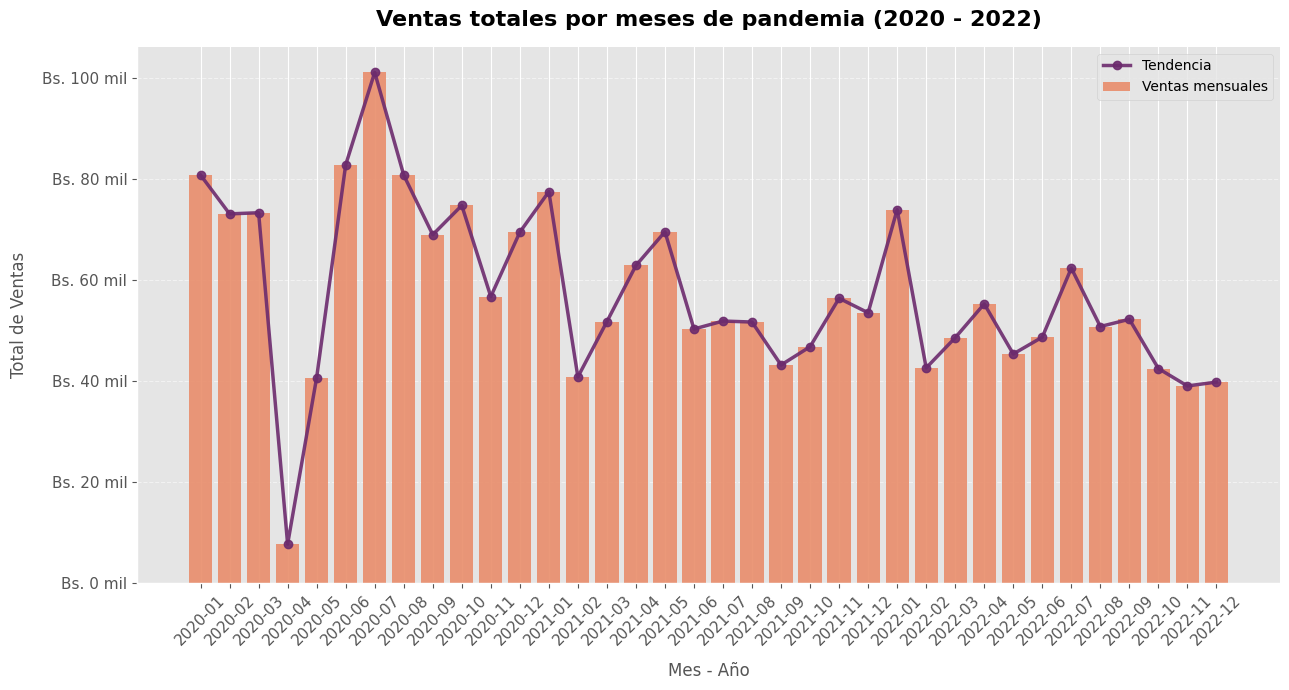

In [34]:
df_pandemia = (
    df[df['fecha'].dt.year.isin([2020, 2021, 2022])]
    .groupby('id_venta')
    .agg({
        'fecha': 'first',
        'total_venta': 'first'
    })
    .reset_index()
)

df_pandemia['mes_ano'] = df_pandemia['fecha'].dt.to_period('M')
ventas_mensuales = df_pandemia.groupby('mes_ano')['total_venta'].sum()

def miles_formatter(x, pos):
    return f'Bs. {x/1000:,.0f} mil'

fig, ax = plt.subplots(figsize=(13, 7))

paleta_flare = sns.color_palette("flare", n_colors=6)
color_unico = paleta_flare[0] 
color_linea = paleta_flare[-1]

bars = ax.bar(
    ventas_mensuales.index.astype(str),
    ventas_mensuales,
    color=color_unico,
    linewidth=0.8,
    alpha=0.9,
    label='Ventas mensuales'
)

ax.plot(
    ventas_mensuales.index.astype(str),
    ventas_mensuales,
    color=color_linea,
    marker='o',
    linewidth=2.5,
    markersize=6,
    alpha=0.9,
    label='Tendencia'
)


ax.yaxis.set_major_formatter(FuncFormatter(miles_formatter))
ax.set_title('Ventas totales por meses de pandemia (2020 - 2022)', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Mes - Año', fontsize=12, labelpad=10)
ax.set_ylabel('Total de Ventas', fontsize=12, labelpad=10)
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='both', labelsize=11)
ax.legend(fontsize=10, frameon=True)
ax.grid(axis='y', linestyle='--', alpha=0.5)

sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()


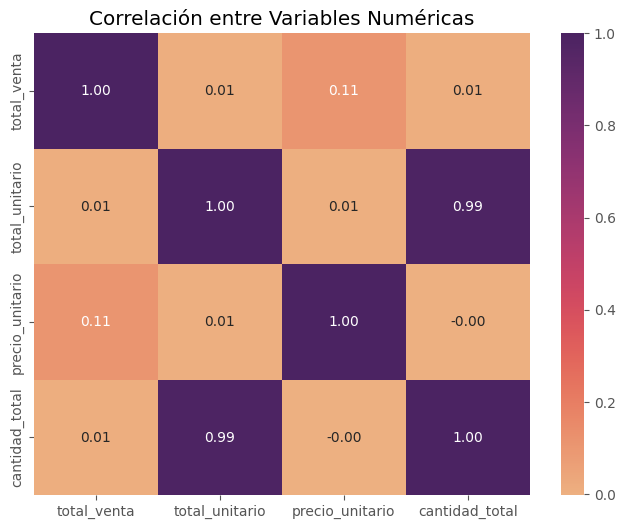

In [37]:
correlation_matrix = df[['total_venta', 'total_unitario', 'precio_unitario', 'cantidad_total']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt='.2f')
plt.title("Correlación entre Variables Numéricas")
plt.show()